<a href="https://colab.research.google.com/github/Adham-amr-1/GTC-ML-Project1-hotel-bookings/blob/main/GTC_ML_Project_1_Data_Cleaning_%26_Preprocessing_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
# Upload Required Data set to Colab Notebook
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (2).csv


In [120]:
# Import Nessecary Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 200)

# Exploratory Data Analysis ( EDA )

In [121]:
# Loading data to df
df = pd.read_csv('hotel_bookings.csv')

In [122]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [123]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [124]:
df.shape

(119390, 32)

In [125]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [127]:
df.groupby("hotel").count()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
City Hotel,79330,79330,79330,79330,79330,79330,79330,79330,79330,79326,79330,79330,79306,79330,79330,79330,79330,79330,79330,79330,79330,79330,71199,3689,79330,79330,79330,79330,79330,79330,79330
Resort Hotel,40060,40060,40060,40060,40060,40060,40060,40060,40060,40060,40060,40060,39596,40060,40060,40060,40060,40060,40060,40060,40060,40060,31851,3108,40060,40060,40060,40060,40060,40060,40060


In [128]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [129]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [130]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [131]:
df.duplicated().sum()

np.int64(31994)

In [132]:
df.dtypes.value_counts()

,count
int64,16
object,12
float64,4


In [133]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1


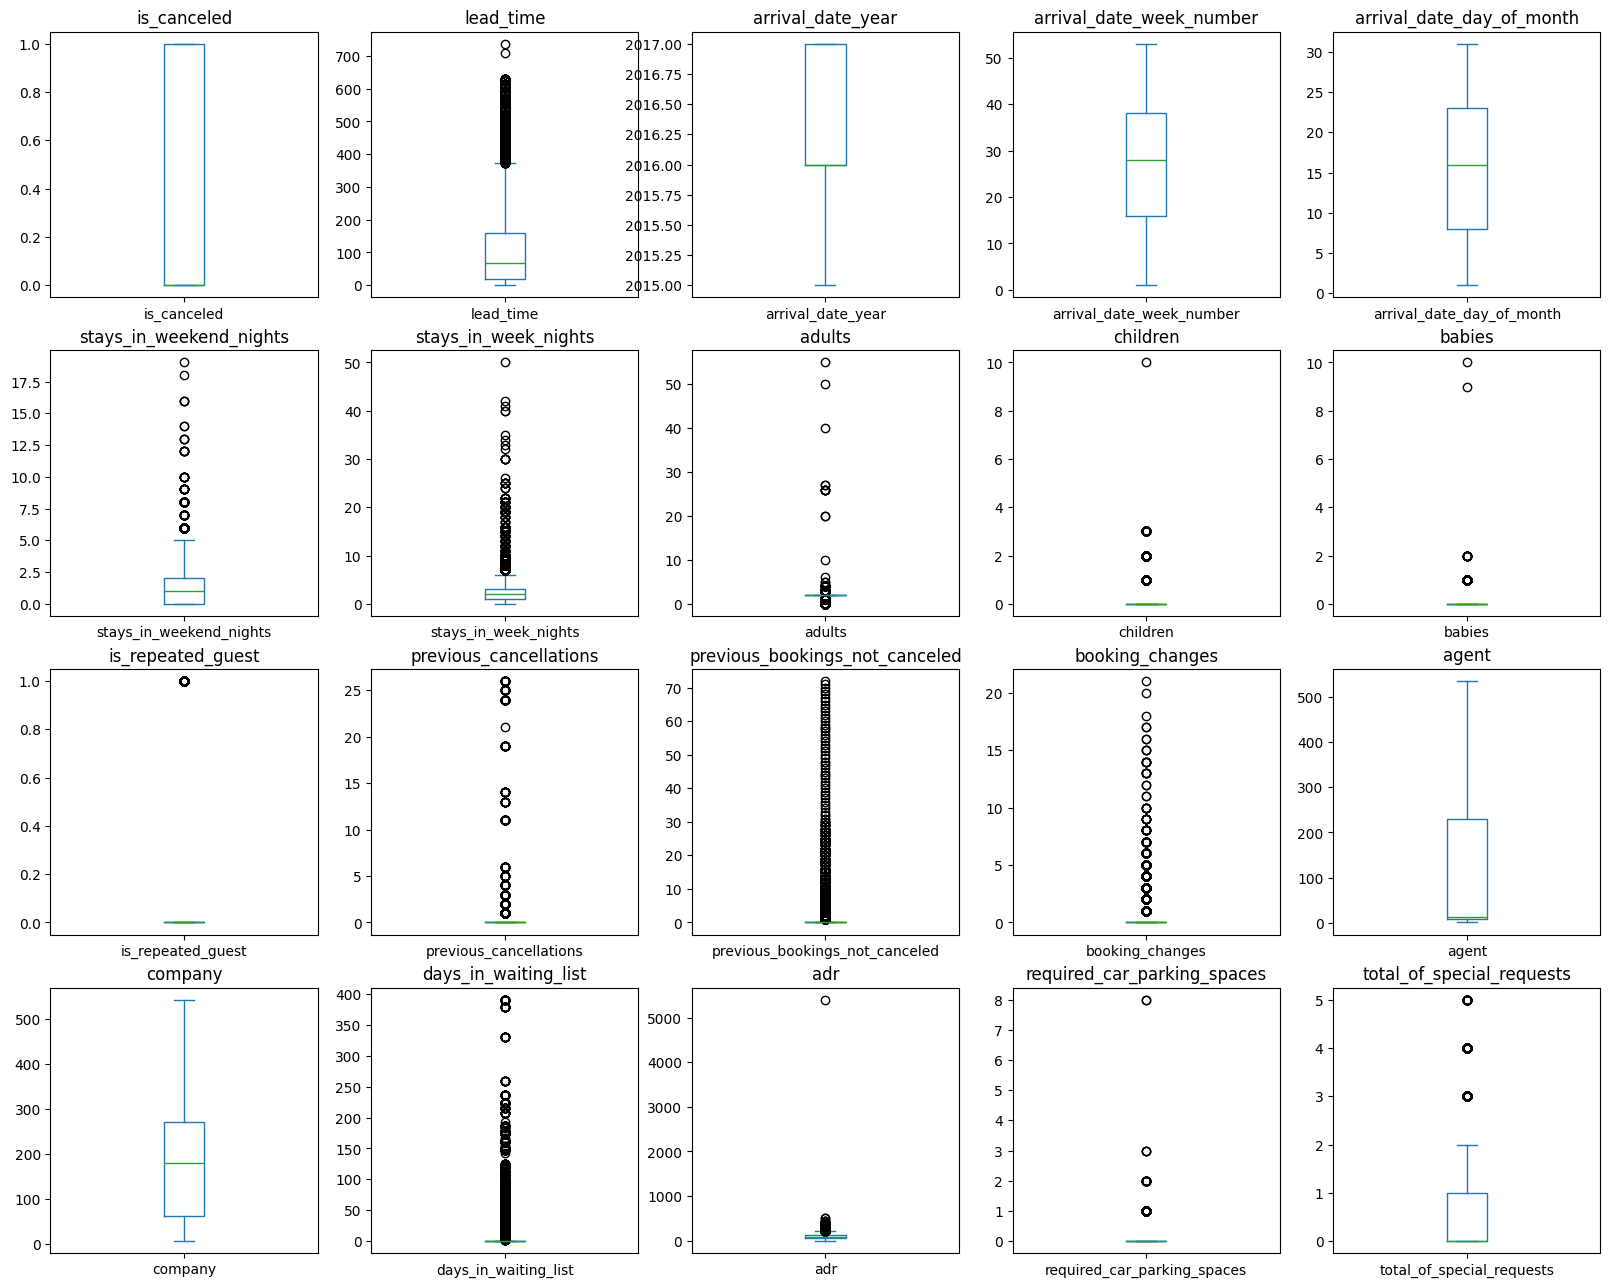

In [134]:
numeric_df.plot(kind='box', subplots=True, layout=(5,5), \
                            figsize=(20,20), \
                            sharex=False, sharey=False, \
                            title=[col for col in numeric_df.columns])
plt.show()

<Axes: >

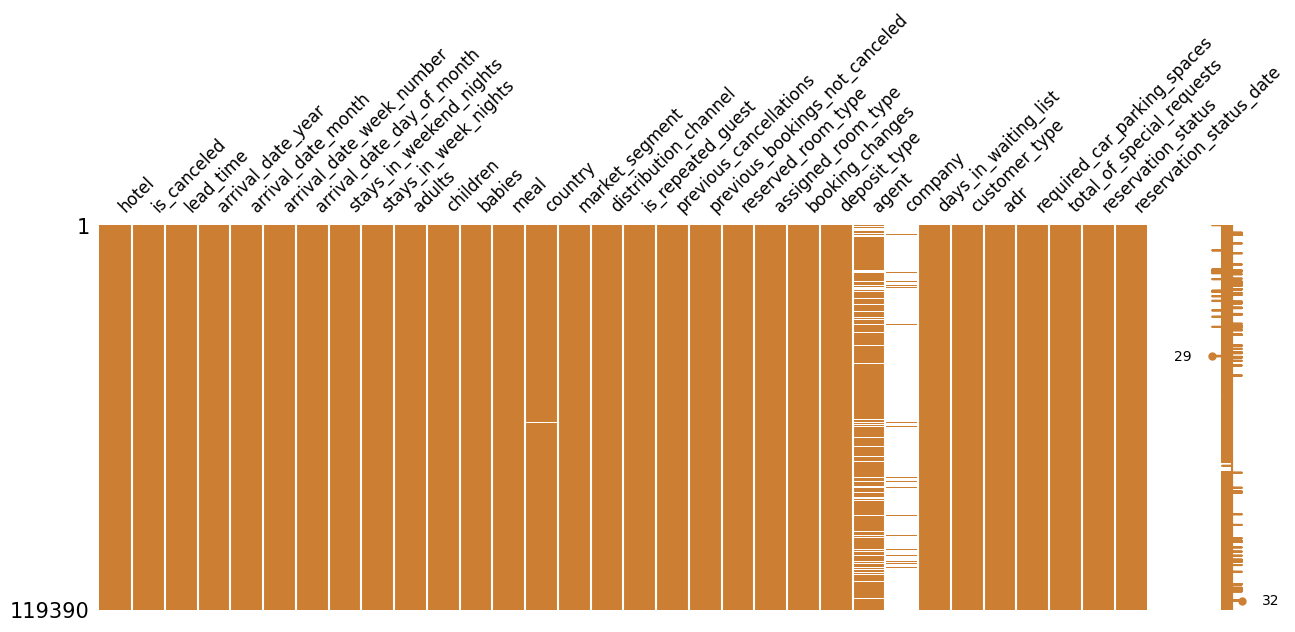

In [135]:
msno.matrix(df, figsize=(15,5), fontsize=12, color=(0.8, 0.5, 0.2))

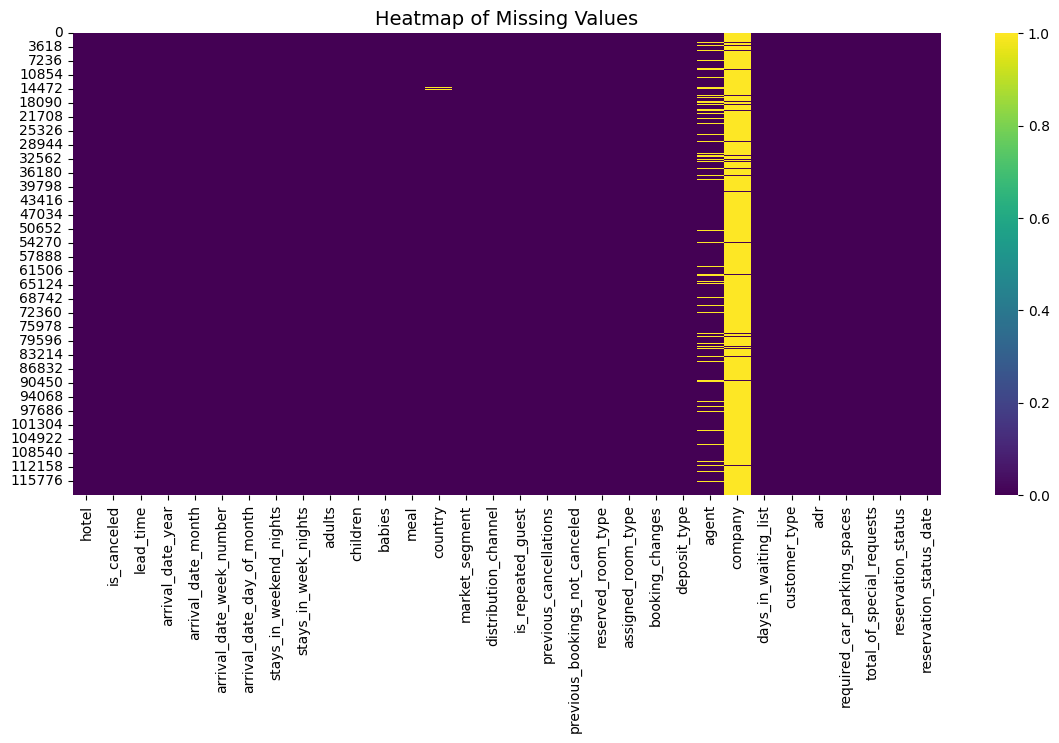

In [136]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cmap="viridis")
plt.title("Heatmap of Missing Values", fontsize=14)
plt.show()

In [137]:
# IQR Method
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                         1.00
lead_time                         142.00
arrival_date_year                   1.00
arrival_date_week_number           22.00
arrival_date_day_of_month          15.00
stays_in_weekend_nights             2.00
stays_in_week_nights                2.00
adults                              0.00
children                            0.00
babies                              0.00
is_repeated_guest                   0.00
previous_cancellations              0.00
previous_bookings_not_canceled      0.00
booking_changes                     0.00
agent                             220.00
company                           208.00
days_in_waiting_list                0.00
adr                                56.71
required_car_parking_spaces         0.00
total_of_special_requests           1.00
dtype: float64


Some Comments On Data From The EDA
>- There's only two hotels exist
>- Many Missing Value Exist in company & agent must be handled
>- 31994 Duplicated Rows must be removed
>- The Data Contain Many Outliers
>- Some Features Must be Corrected to the right data type
>- We need To Handle Object to be numeric as the ML Model understand Numerics only


# Data Cleanning

### Handle Missing Values

In [138]:
# Handling Nulls
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)

In [139]:
df[['company', 'agent']].isna().sum()

,0
company,0
agent,0


In [140]:
most_frequent_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(most_frequent_country)

In [141]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [142]:
df['children'].value_counts()

,count
children,
0.0,110796
1.0,4861
2.0,3652
3.0,76
10.0,1


In [143]:
median_children =df['children'].median()
df['children'] = df['children'].fillna(median_children)

In [144]:
# Check that data has no Missing Value
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


### Handle Duplicated Rows

In [145]:
#Identify Duplicated
df.duplicated().sum()

np.int64(32013)

In [146]:
df = df.drop_duplicates()

In [147]:
# Checking Duplicated
df.duplicated().sum()

np.int64(0)

In [148]:
df.shape

(87377, 32)

### Handle Outliers

In [149]:
# This method (Capping) is widely used in financial and hospitality datasets where rare but extreme
### capping ensures no data is lost, which is especially important when the dataset is not extremely large
### Setting a threshold of 1000 is reasonable since hotel rates rarely exceed this value in real-world scenarios.
df['adr'] = df['adr'].clip(upper=1000)

In [150]:
df[numeric_df.columns].head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.0,0,1


In [151]:
non_numeric_df = df.select_dtypes(exclude=['number'])
non_numeric_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


# Feature Engineering & Preprocessing

In [152]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [153]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [154]:
df['is_family'] = ((df['children'] >= 1) | (df['babies'] >= 1)).astype(int)

In [155]:
non_numeric_df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [156]:
low_cardinality_categories = ['deposit_type', 'customer_type', 'meal', 'market_segment', 'distribution_channel']

In [157]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe_array = ohe.fit_transform(df[low_cardinality_categories])
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(low_cardinality_categories))

In [158]:
freq_encoding = df['country'].value_counts().to_dict()
df['country_freq'] = df['country'].map(freq_encoding)

In [159]:
df[['country', 'country_freq']].head()

,country,country_freq
0,PRT,27886
1,PRT,27886
2,GBR,10433
3,GBR,10433
4,GBR,10433


In [160]:
## As There's Some Columns That will not affect on ML as it's not important
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)

In [161]:
Inputs = df.drop(columns=['is_canceled'])
Outputs = df['is_canceled']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    Inputs, Outputs, test_size=0.2, random_state=42
)

In [163]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (69901, 33)
Testing set size: (17476, 33)


# DONE